## INTRODUCTION TO MACHINE LEARNING - FINAL PROJECT
by Mercan Karacabey

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("master.csv")

In [151]:
### Data overview

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


##### Data Preprocessing Step

In [4]:
data = data.drop(['HDI for year', 'country-year','suicides_no','population','generation'], axis=1)

In [8]:
del data[' gdp_for_year']

In [28]:
del data['country']

In [9]:
data.head()

,country,year,sex,age,suicides,gdp_per_capita
0,Albania,1987,male,15-24 years,6.71,796
1,Albania,1987,male,35-54 years,5.19,796
2,Albania,1987,female,15-24 years,4.83,796
3,Albania,1987,male,75+ years,4.59,796
4,Albania,1987,male,25-34 years,3.28,796


In [7]:
data

,country,year,sex,age,suicides,gdp_for_year,gdp_per_capita
0,Albania,1987,male,15-24 years,6.71,"2,156,624,900",796
1,Albania,1987,male,35-54 years,5.19,"2,156,624,900",796
2,Albania,1987,female,15-24 years,4.83,"2,156,624,900",796
3,Albania,1987,male,75+ years,4.59,"2,156,624,900",796
4,Albania,1987,male,25-34 years,3.28,"2,156,624,900",796
5,Albania,1987,female,75+ years,2.81,"2,156,624,900",796
6,Albania,1987,female,35-54 years,2.15,"2,156,624,900",796
7,Albania,1987,female,25-34 years,1.56,"2,156,624,900",796
8,Albania,1987,male,55-74 years,0.73,"2,156,624,900",796
9,Albania,1987,female,5-14 years,0.00,"2,156,624,900",796


In [146]:
## Some visualizations from data

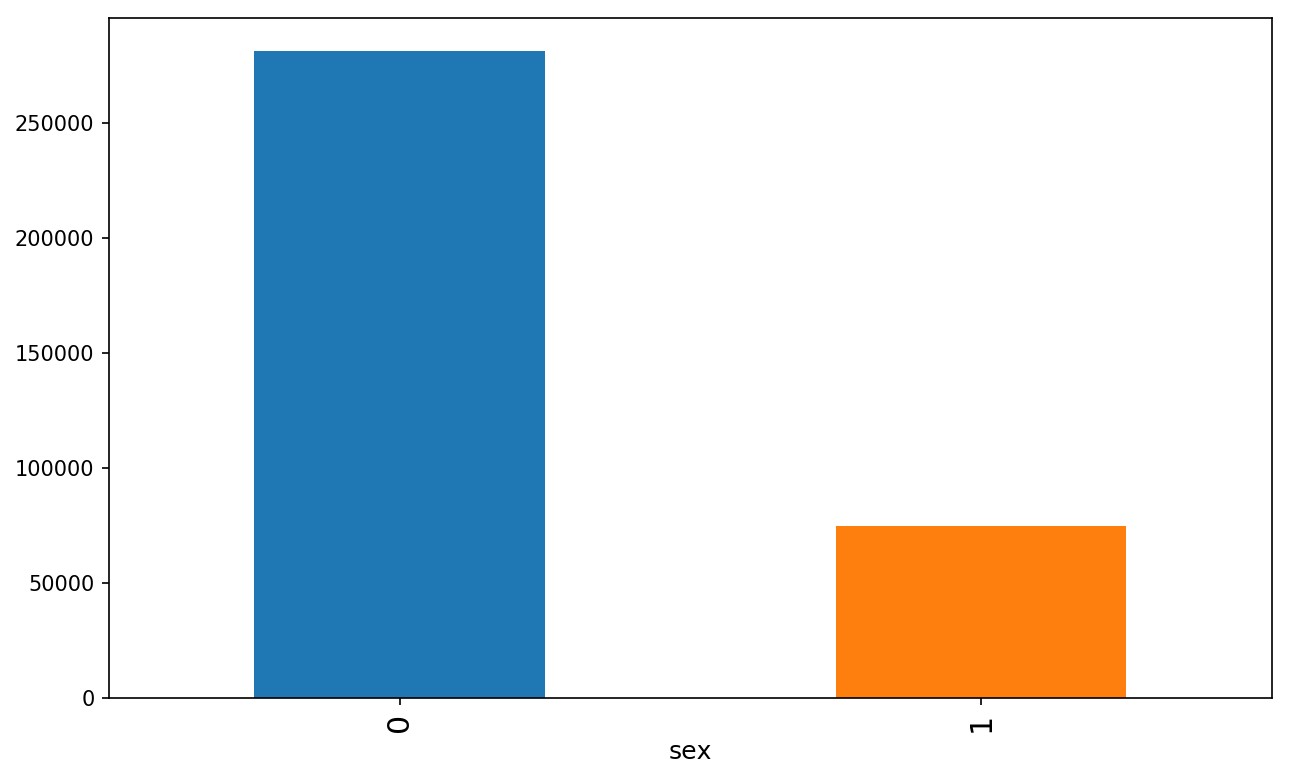

In [136]:
data.groupby('sex').agg('sum')['suicides'].plot(kind='bar', stacked=True)

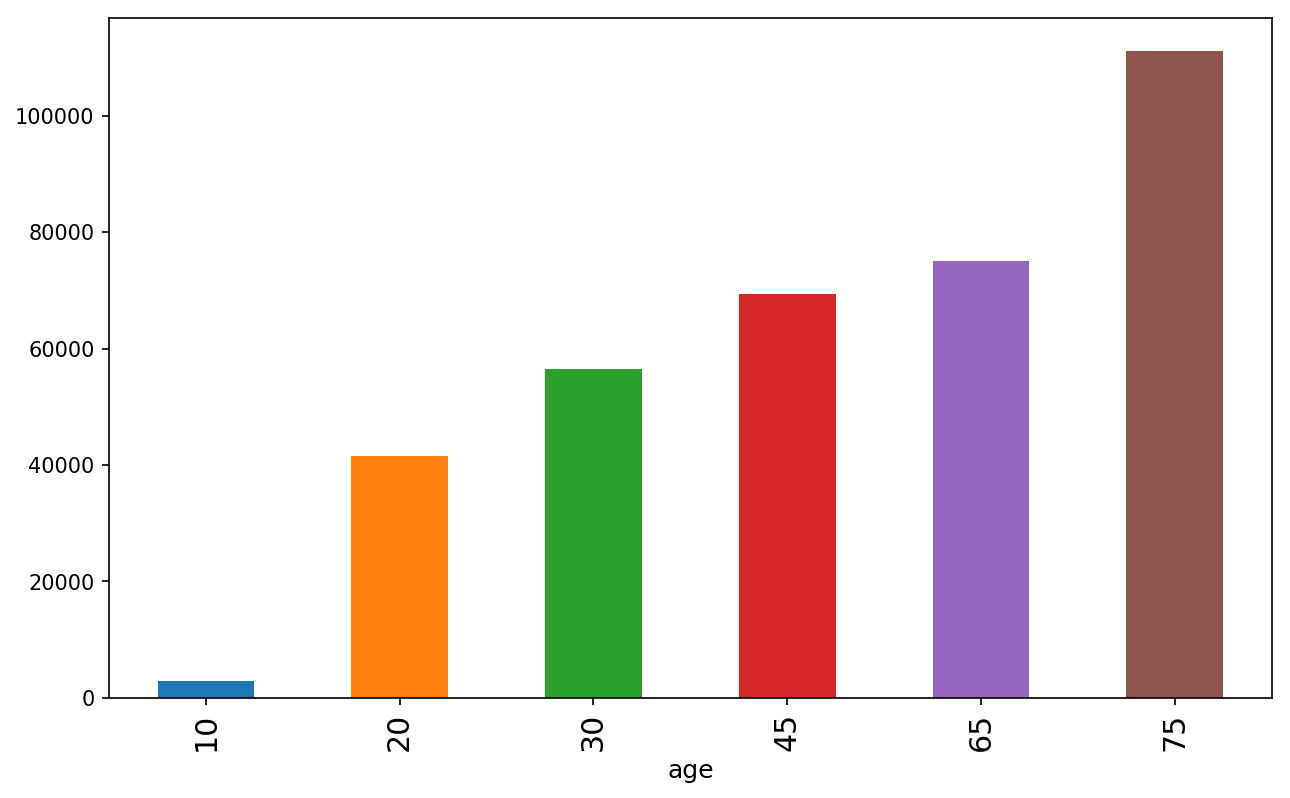

In [143]:
data.groupby('age').agg('sum')['suicides'].plot(kind='bar', stacked=True)

In [6]:
data['suicides'].max()

224.97

In [7]:
data['suicides'].min()

0.0

In [8]:
count_smallerThan100000 = 0
count_smallerThan200000 = 0
count_smallerThan300000 = 0
count_smallerThan400000 = 0
count_smallerThan500000 = 0
count_smallerThan600000 = 0
for row in data.itertuples(index=True, name='Pandas'):
    if(getattr(row,"suicides")<15):
        count_smallerThan100000 = count_smallerThan100000 + 1
    elif((getattr(row,"suicides")>15) and (getattr(row,"suicides")<30)) :
        count_smallerThan200000 = count_smallerThan200000 + 1
    elif((getattr(row,"suicides")>30) and (getattr(row,"suicides")<45)) :
        count_smallerThan300000 = count_smallerThan300000 + 1
    else:
        count_smallerThan600000 = count_smallerThan600000 + 1 

In [9]:
print("<15: ",count_smallerThan100000)
print("<30: ",count_smallerThan200000)
print("<45: ",count_smallerThan300000)
print(">45: ",count_smallerThan600000)

<15:  20168
<30:  4396
<45:  1575
>45:  1681


In [10]:
## data['suicides'] = data['suicides'].replace([data['suicides'] < 15.00], 'Not_prone')
## data['suicides'] = data['suicides'].replace(([data['suicides'] > 15.00) and ([data['suicides'] < 30.00)], 'prone')
## data['suicides'] = data['suicides'].replace([data['suicides'] > 45.00], 'Suicide')

In [11]:
data.describe()

,year,suicides,gdp_per_capita
count,27820.000000,27820.000000,27820.000000
mean,2001.258375,12.816097,16866.464414
std,8.469055,18.961511,18887.576472
min,1985.000000,0.000000,251.000000
25%,1995.000000,0.920000,3447.000000
50%,2002.000000,5.990000,9372.000000
75%,2008.000000,16.620000,24874.000000
max,2016.000000,224.970000,126352.000000


In [12]:
data.fillna(data.mean(), inplace=True)

###### Firstly, i thought that data is appropriate for clustering because labels hasnt known exactly. But the result of clustering retrieve the different values for each pair clustering operation.

In [ ]:
## K - Means - Same Type

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [145]:
## Visualizations Suicides & other Features

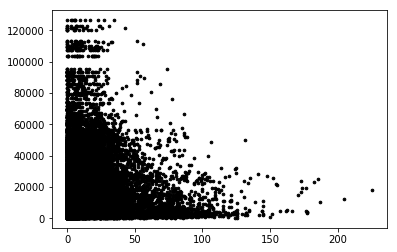

In [15]:
f1 = data['suicides'].values
f2 = data['gdp_per_capita'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

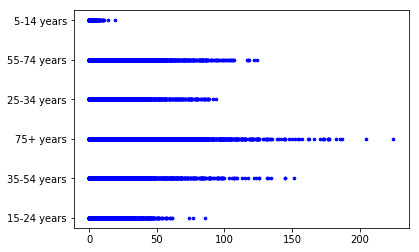

In [16]:
f3 = data['suicides'].values
f4 = data['age'].values
X = np.array(list(zip(f3, f4)))
plt.scatter(f3, f4, c='blue', s=7)

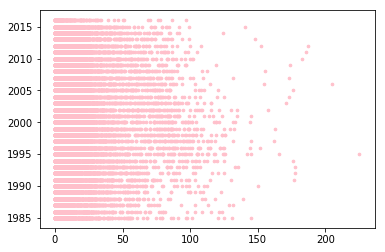

In [18]:
f5 = data['suicides'].values
f6 = data['year'].values
X = np.array(list(zip(f5, f6)))
plt.scatter(f5, f6, c='pink', s=7)

##### K Means Modeling

In [23]:
X = np.array(list(zip(f5, f6, f2)))
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [24]:
print(centroids) 

[[1.36790475e+01 2.00163687e+03 2.88013243e+04]
 [1.25112448e+01 2.00928772e+03 6.29539604e+04]
 [1.25178003e+01 2.00004146e+03 6.04811067e+03]]


###### In these results, the average distance from centroid are similar. So, this factors(age,gdp, suicides) affect is similar. It hasnt property for each feature that affectable.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=27820, n_features=3, centers=4)

In [32]:
X = np.array(list(zip(f5, f6, f2)))
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [147]:
### Output of the 3 cluster on 3dimension view.

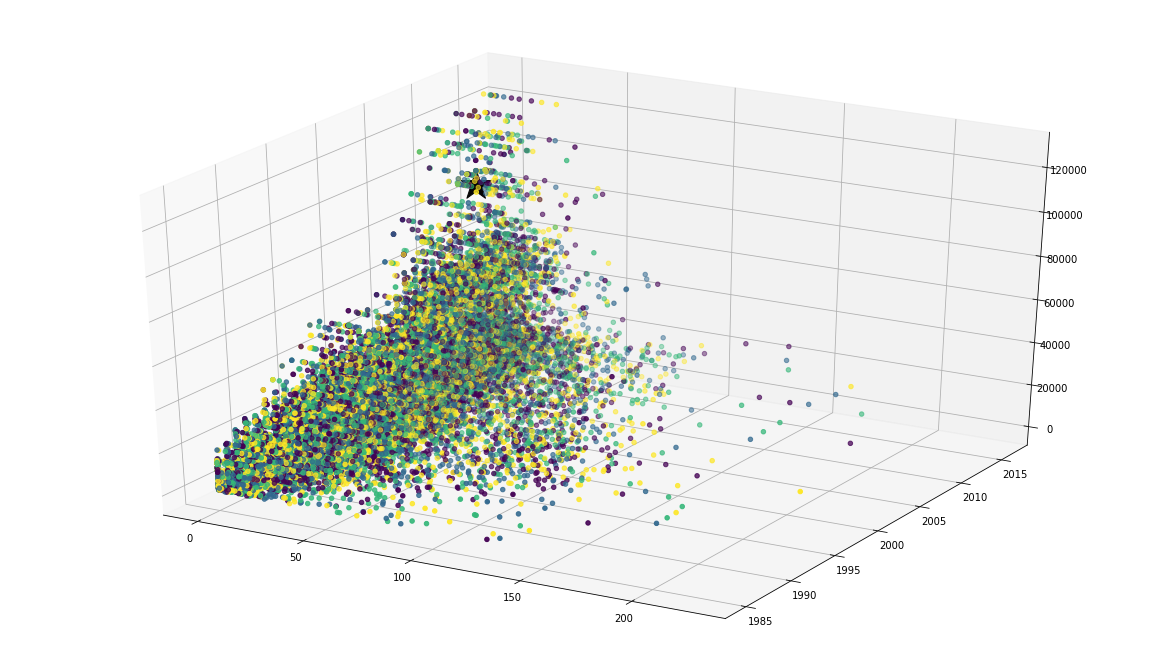

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

#### K-Means With Same Types

Convert the data type from string to number. For doing same types.

In [152]:
## Feature Engineering for creation of model

In [12]:
data['sex'] = data['sex'].replace([data['sex'] == 'male'], '0')

In [14]:
data['sex'] = data['sex'].replace([data['sex'] == 'female'], '1')

In [15]:
data.head()

,country,year,sex,age,suicides,gdp_for_year,gdp_per_capita
0,Albania,1987,male,15-24 years,6.71,"2,156,624,900",796
1,Albania,1987,male,35-54 years,5.19,"2,156,624,900",796
2,Albania,1987,female,15-24 years,4.83,"2,156,624,900",796
3,Albania,1987,male,75+ years,4.59,"2,156,624,900",796
4,Albania,1987,male,25-34 years,3.28,"2,156,624,900",796


In [22]:
data["sex"]= data["sex"].replace("male", 0) 
data["sex"]= data["sex"].replace("female", 1) 

In [23]:
data.head()

,country,year,sex,age,suicides,gdp_per_capita
0,Albania,1987,0,20,6.71,796
1,Albania,1987,0,45,5.19,796
2,Albania,1987,1,20,4.83,796
3,Albania,1987,0,75,4.59,796
4,Albania,1987,0,30,3.28,796


In [14]:
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [16]:
data["age"]= data["age"].replace("5-14 years", 10) 
data["age"]= data["age"].replace("15-24 years", 20) 
data["age"]= data["age"].replace("25-34 years", 30) 
data["age"]= data["age"].replace("35-54 years", 45) 
data["age"]= data["age"].replace("55-74 years", 65)
data["age"]= data["age"].replace("75+ years", 75)


In [17]:
data.head()

,country,year,sex,age,suicides,gdp_per_capita
0,Albania,1987,male,20,6.71,796
1,Albania,1987,male,45,5.19,796
2,Albania,1987,female,20,4.83,796
3,Albania,1987,male,75,4.59,796
4,Albania,1987,male,30,3.28,796


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
f1 = data['suicides'].values
f2 = data['gdp_per_capita'].values
f3 = data['sex'].values
f4 = data['age'].values
X = np.array(list(zip(f1, f2, f3, f4)))

In [26]:
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
## Center of clusters

In [27]:
print(centroids) # From sci-kit learn

[[1.24197293e+01 5.45103613e+03 5.00000000e-01 4.08619888e+01]
 [1.31916595e+01 4.87677910e+04 5.00000000e-01 4.09280885e+01]
 [1.38241777e+01 2.43897237e+04 5.00000000e-01 4.08605472e+01]
 [1.05495471e+01 9.21888913e+04 5.00000000e-01 4.08333333e+01]]


In [148]:
## According to centroid distance results, 'Age' is affected the result and rate of suicides.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=27820, n_features=4, centers=4)

In [31]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

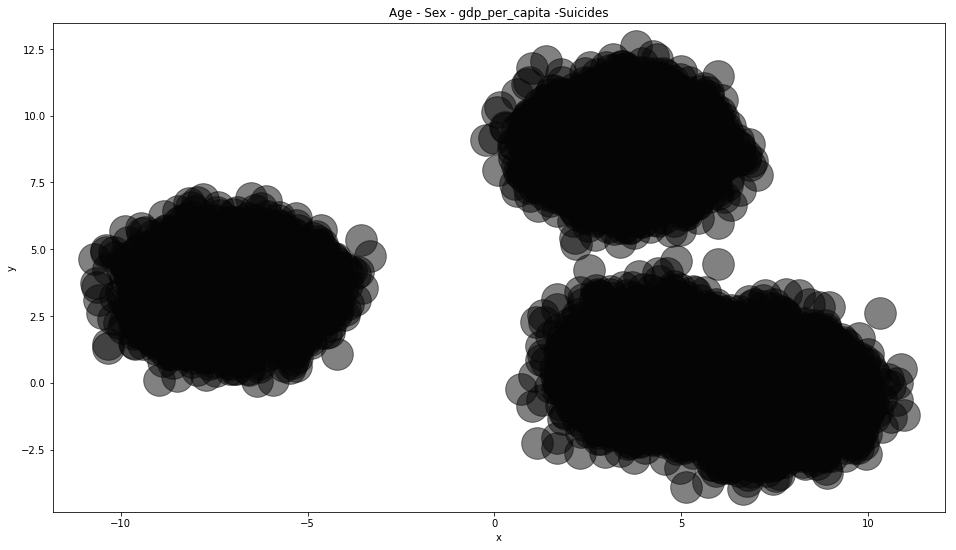

In [40]:
plt.scatter(X[:, 3], X[:, 1], s=1000, c='#050505', alpha=0.5)
plt.title('Age - Sex - gdp_per_capita -Suicides')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [149]:
## 4 Dimension View

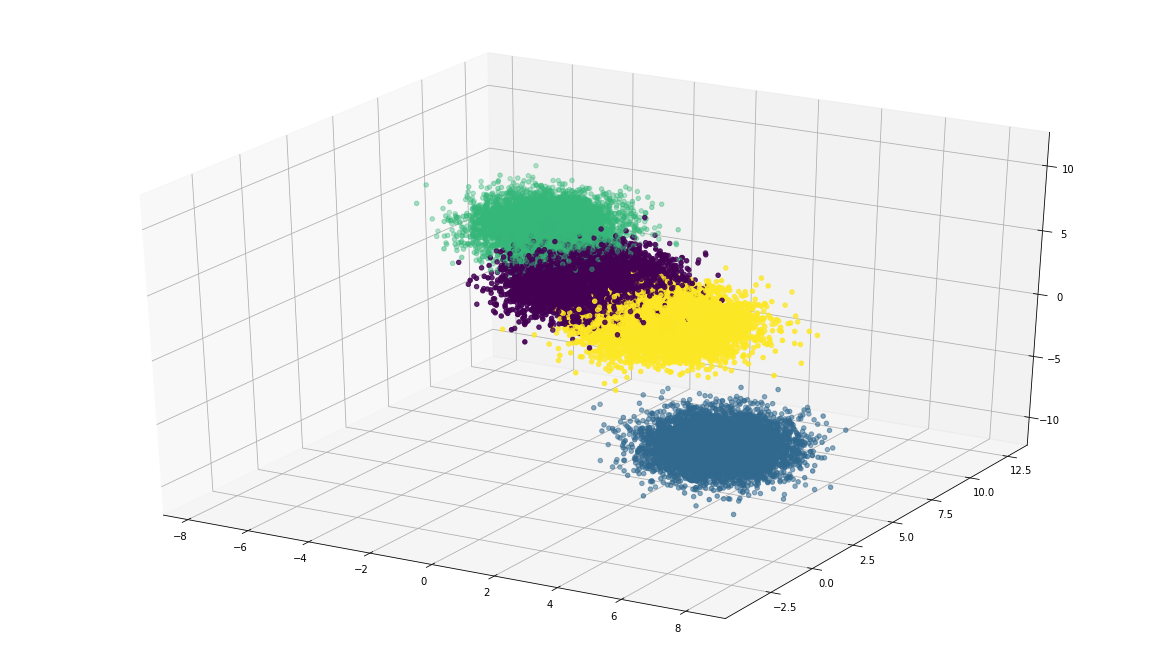

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 3], marker='*', c='#050505', s=1000)

In [20]:
## For Classification - Seperate out the train & test data

In [75]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [76]:
y = data['suicides']

In [ ]:
X = data.iloc[:,1:5]

In [129]:
X = data.iloc[:, :-1].values #get a copy of dataset exclude last column
y = data.iloc[:, 4].values #get array of dataset in column 1st

In [130]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [131]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

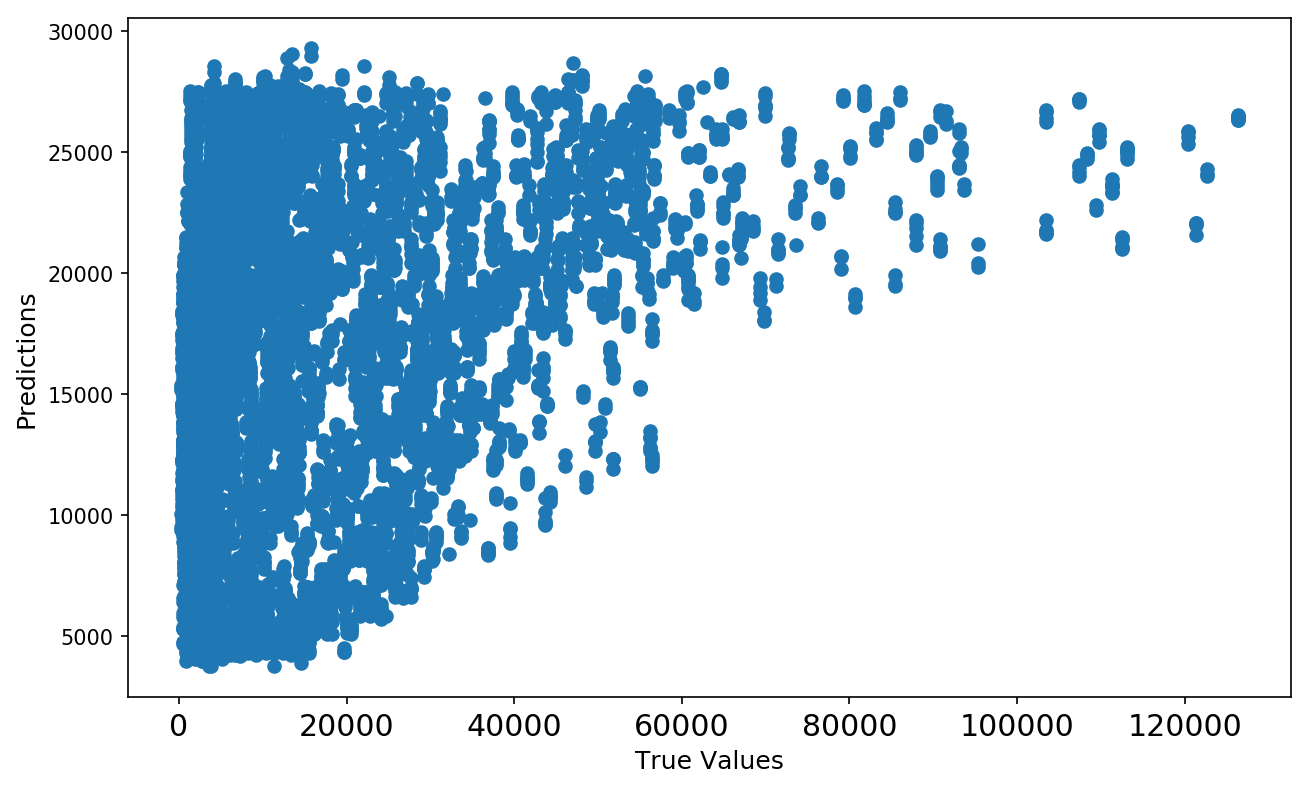

In [132]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [135]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8877689075548079


In [42]:
## Split the train data for cross validation

In [84]:
def split_vals(a,n): return a[:n], a[n:]
valid_count =1000
n_trn = len(X_train)-valid_count
x_train1, x_valid1 = split_vals(X_train, n_trn)
y_train1, y_valid1 = split_vals(y_train, n_trn)

In [85]:
x_train1.shape,y_train1.shape,x_valid1.shape,y_valid1.shape

((18474, 5), (18474, 1), (1000, 5), (1000, 1))

In [86]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [153]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_test)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 427 1606 1095 ...  212 1827  948]
multiclass
multiclass
multiclass


In [95]:
X = ['year','sex','age','gdp_per_capita']
Y = ['suicides']

In [100]:
X,Y = data.loc[:,data.columns != 'suicides'], data.loc[:,'suicides']

In [150]:
## Logistic Regression Model

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
    X, Y, test_size=0.3)

In [137]:
clf = LogisticRegression()
clf.fit(X_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.35401
